In [1]:
import sys,os
p = os.path.abspath("../src/")
if(not p in sys.path):
    sys.path.append(p)

In [2]:

from hebbian import HebbianLayer
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
# import tracemalloc
import objgraph
from sklearn.svm import LinearSVC
# (Pdb) objgraph.show_most_common_types(limit=20)

## network
class MLPNet(nn.Module):
    def __init__(self,neurons,input_w,input_h):
        super(MLPNet, self).__init__()
        self.neurons = neurons
        self.input_w = input_w
        self.input_h = input_h
        self.fc1 = nn.Linear(self.input_w*self.input_h*self.neurons, 10)
        # self.fc2 = nn.Linear(500, 256)
        # self.fc3 = nn.Linear(256, 10)
        self.ceriation = nn.CrossEntropyLoss()
    def forward(self, x, target):
        x = x.view(-1, self.input_w*self.input_h*self.neurons)
        x = F.softmax(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = F.relu(self.fc3(x))
        loss = self.ceriation(x, target)
        return x, loss
    def name(self):
        return 'mlpnet'


def unnormalize(img):
    img = img / 2 + 0.5
    return img

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def plot_images(images,show=True):
    from matplotlib import pyplot as plt
    # plt.axis('off')
    fig, axes = plt.subplots(15,15,sharex=True,sharey=True)
    for k,im in enumerate(images):
        i,j = k // 15, k % 15
        ax = axes[i,j]
        ax.set_axis_off()
        data = im if not isinstance(im,Variable) else im.data
        data = data if not isinstance(data,torch.Tensor) else data.squeeze().numpy()
        #print(data.shape)
        ax.matshow(data)#.reshape(7,7))
    for k in range(k,15*15):
        i,j = k // 15, k % 15
        axes[i,j].set_axis_off()
            # fig.colorbar(im, ax=ax)
    if(show):plt.show()
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25


In [3]:
# Basically re-maps the [0,1] pixel to the [-1,1] range so that mean is 0.
transform = transforms.Compose(
    [transforms.ToTensor(),])
     # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Getting the data
batch_size = 100

trainset = torchvision.datasets.MNIST(root='../src/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='../src/data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [4]:
net = HebbianLayer(1,max_active_post_neurons=1,
                    add_at_sum=.6,
                    add_max_corr = .7,
                    average_activation=.2,
                    conic_filters=False,
                    prune_max_corr=.6,
                    spatial_locality=0.0,
                    center=True)

INITIALIZE
torch.Size([1, 49, 1, 1])
VIA PATCHES
Variable containing:
 0.2041
 0.0804
 0.0804
 0.2041
 0.2300
 0.2127
 0.1767
 0.2386
 0.2127
 0.2026
 0.2314
 0.1911
-0.0707
 0.0041
 0.0674
-0.0865
-0.1253
-0.0131
 0.1595
 0.1825
 0.0171
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
 0.1523
 0.1897
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
-0.0822
 0.1739
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
 0.0099
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
-0.1253
-0.0865
[torch.FloatTensor of size 49]

MIN_a: 0.00 < 0.60; MIN_W: -0.89 < 0.70
MIN_a: 0.00 < 0.60; MIN_W: -0.10 < 0.70
MIN_a: 0.00 < 0.60; MIN_W: -0.05 < 0.70
MIN_a: 0.00 < 0.60; MIN_W: -0.01 < 0.70
MIN_a: 0.00 < 0.60; MIN_W: -0.00 < 0.70
MIN_a: 0.00 < 0.60; MIN_W: 0.00 < 0.70
MIN_a: 0.01 < 0.60; MIN_W: 0.01 < 0.70
MIN_a: 0.03 < 0.60; MIN_W: 0.02 < 0.70


/usr/local/lib/python2.7/dist-packages/torch/autograd/_functions/basic_ops.py:17: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return a.add(b)


MIN_a: 0.10 < 0.60; MIN_W: 0.05 < 0.70
MIN_a: 0.10 < 0.60; MIN_W: 0.05 < 0.70
MIN_a: 0.10 < 0.60; MIN_W: 0.06 < 0.70
MIN_a: 0.10 < 0.60; MIN_W: 0.08 < 0.70
MIN_a: 0.10 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.10 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.20 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.30 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.38 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.38 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.38 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.50 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.50 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.53 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.58 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.59 < 0.60; MIN_W: 0.10 < 0.70
MIN_a: 0.61 < 0.60; MIN_W: 0.10 < 0.70
IMAGES SEEN: 100 , NEURONS: 25
Variable containing:

Columns 0 to 9 
 0.0000  0.0004  0.0533  0.0998  0.0852  0.0518  0.0000  0.0951  0.0508  0.0718
 0.0000  0.0000  0.0577  0.0675  0.1323  0.0884  0.0000  0.0540  0.0687  0.1110
 0.0000  0.0000  0.0000  0.0383  0.0589  0.0869  0.0000  0.0318  0.0492  0.0494
 0.0000  0.0000  0.0000  0.0

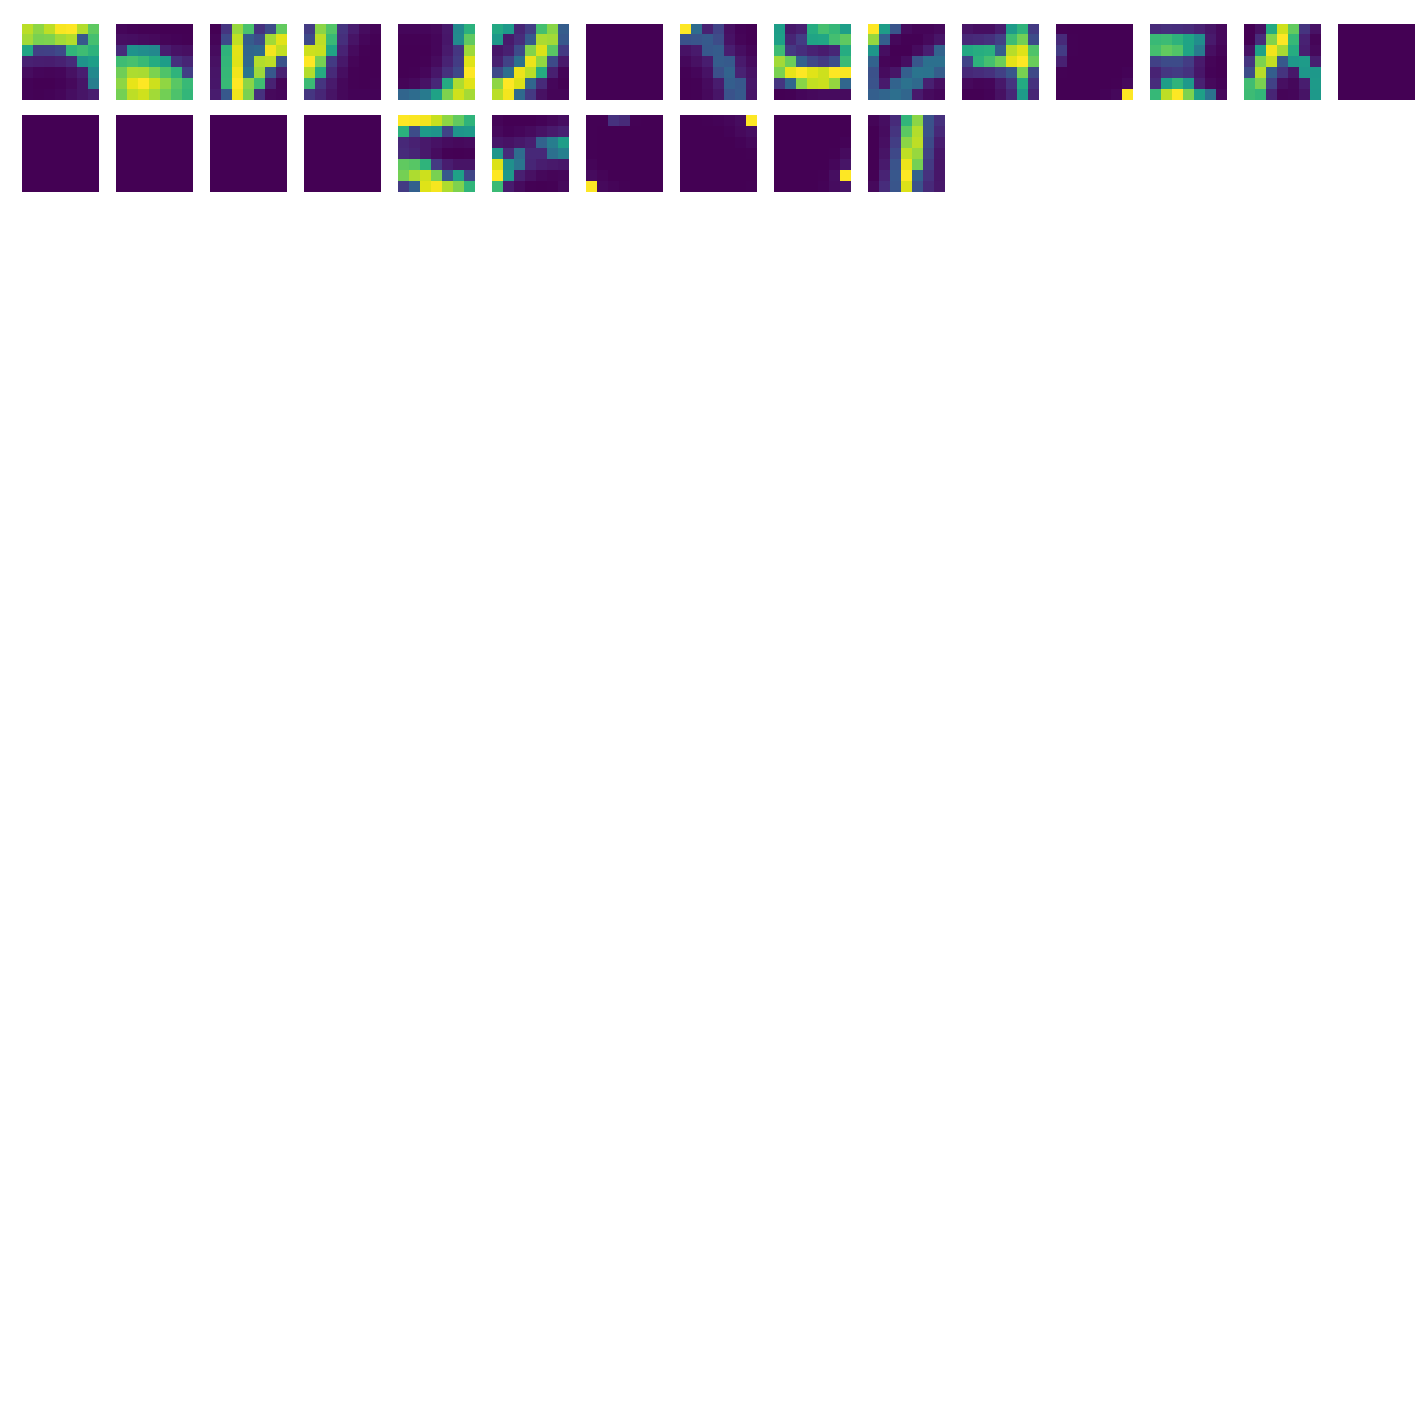

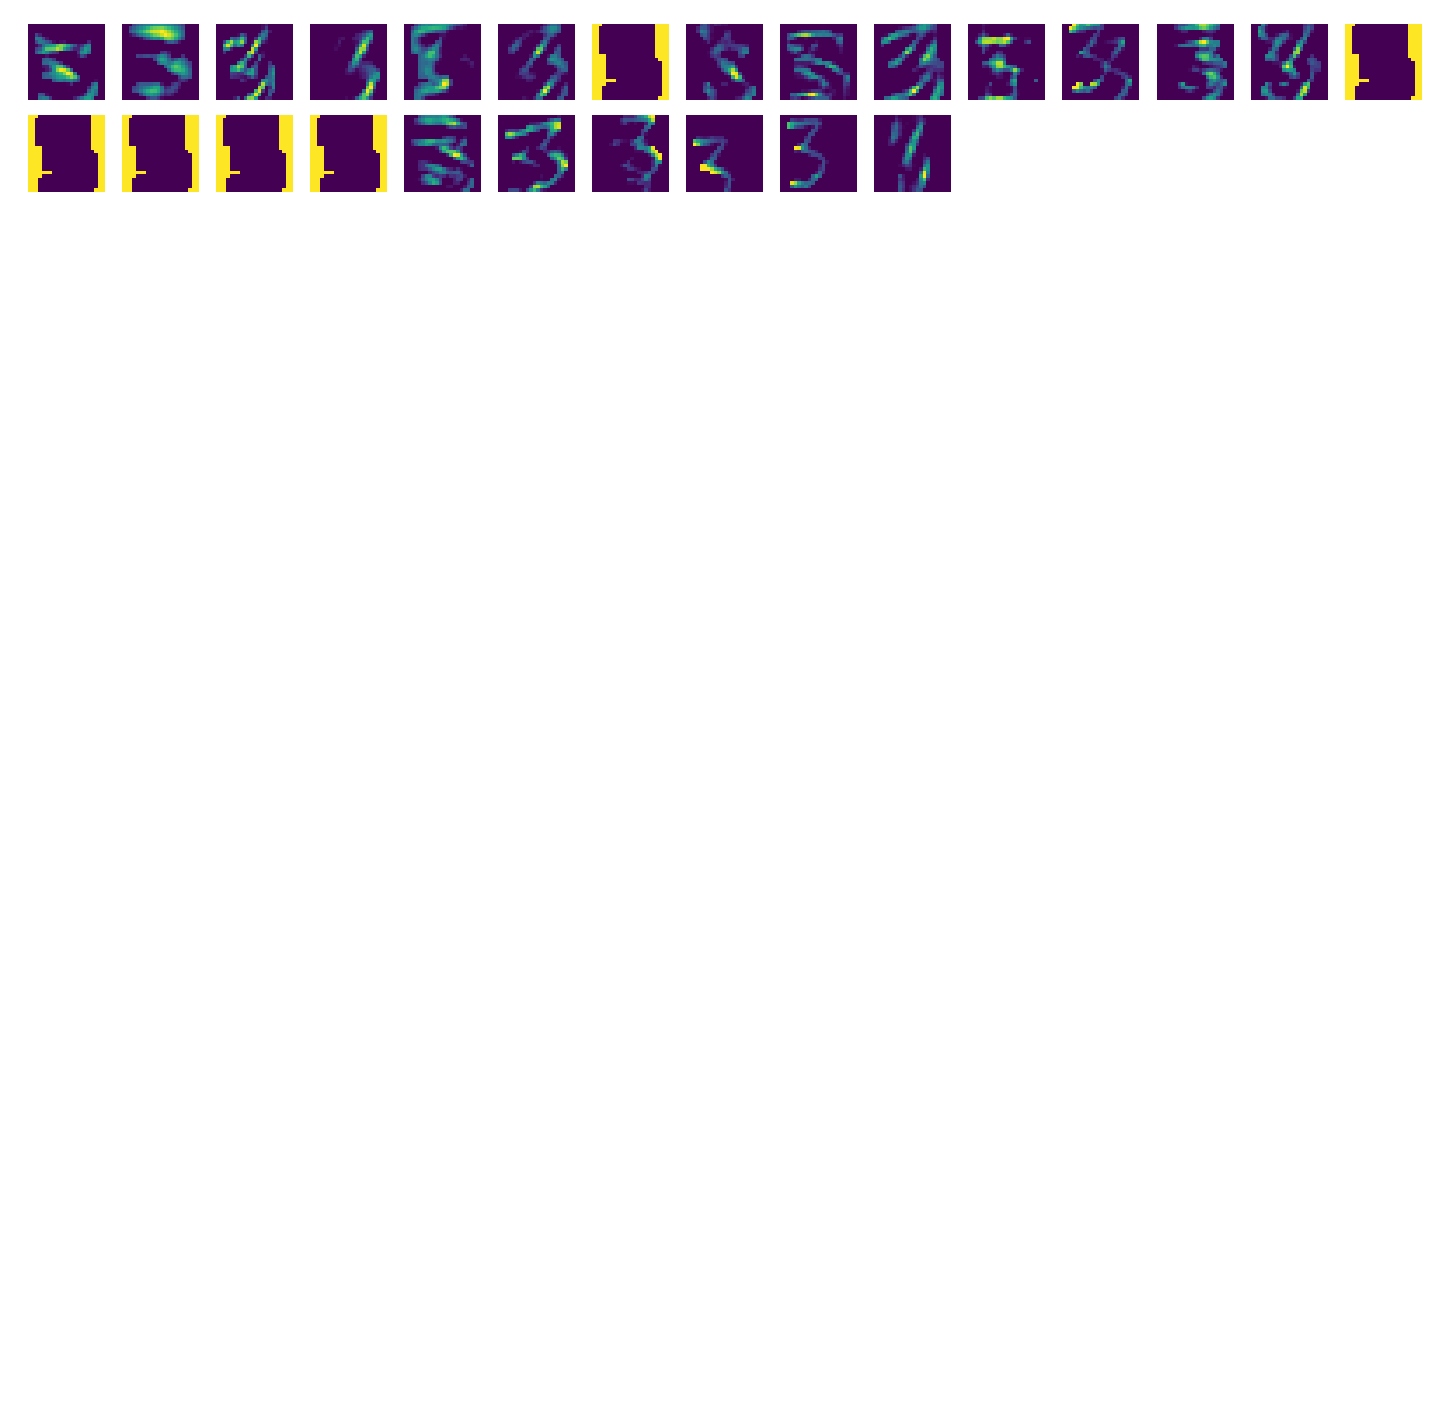

In [5]:
IMAGES_TO_SEE = 100
pool = lambda x: F.max_pool2d(x,(2,2))
run2,run3 = True,True

images_seen = 0 
for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = Variable(inputs,requires_grad=False,volatile=True)
    # print(inputs.size())
    if(not net.initialized): net.initialize({"patches":net.get_patches(inputs)})
    
    _,a = net.AHL_update(inputs)
    images_seen += inputs.size()[0]
    print("IMAGES SEEN: %d , NEURONS: %d" % (images_seen,net.num_neurons))
    if(images_seen == IMAGES_TO_SEE):
        print(net.correlation_matrix)
        sub = net.conv.weight[:,:49].view(-1,7,7)
        sub.contiguous()
        # print(torch.max(a))
        plot_images(sub,show=False)
        im = a[0].permute(2,0,1)
        # im = pool(im)
        plot_images(im)
    if(images_seen >= IMAGES_TO_SEE):
        break

In [6]:
layer1_X,layer1_y = [],[]
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = Variable(inputs,requires_grad=False,volatile=True)
    patches,Wx_, a = net.forward(inputs)
    a = pool(a)
    layer1_X.append(a.data.numpy())
    layer1_y.append(labels.numpy())
    if(i%100 == 0):
        print(i*batch_size)
    #if(images_seen >= IMAGES_TO_SEE):
    #    break
layer1_X,layer1_y = np.concatenate(layer1_X),np.concatenate(layer1_y)
layer1_X = layer1_X.reshape(layer1_X.shape[0],-1)

print("FIT ON",layer1_X.shape,layer1_y.shape)
svm = LinearSVC(C=100)
svm.fit(layer1_X,layer1_y)

layer1_X_val,layer1_y_val = [],[]
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = Variable(inputs,requires_grad=False,volatile=True)
    patches,Wx_, a = net.forward(inputs)
    a = pool(a)
    layer1_X_val.append(a.data.numpy())
    layer1_y_val.append(labels.numpy())
    if(i%100 == 0):
        print(i*batch_size)
    #if(images_seen >= IMAGES_TO_SEE):
    #    break
layer1_X_val,layer1_y_val = np.concatenate(layer1_X_val),np.concatenate(layer1_y_val)
layer1_X_val = layer1_X_val.reshape(layer1_X_val.shape[0],-1)

print(layer1_X.shape,layer1_y.shape)

print("TEST ON",layer1_X_val.shape,layer1_y_val.shape)
print("TEST ACC", svm.score(layer1_X_val,layer1_y_val))




0
10000
20000
30000
40000
50000
('FIT ON', (60000, 3025), (60000,))
0
((60000, 3025), (60000,))
('TEST ON', (10000, 3025), (10000,))
('TEST ACC', 0.98480000000000001)
